In [1]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display

### Evaluation

Here you can find an evaluation script. Model is evaluated on validation data. Further more, there are plots from training and evaluation used and further commented in report:
- `result.png` training plot is used for evalution loss and precision during training
- `BoxR_curve.png` Recall-Confidence curve is critical for detection task of single class and thus further commented in report
- `confusion_matrix.png` corresponds with not quite high recall

Few generel comments on resulting metrics. Precision is high in general which is expected since there is only one class. Recall is relatively lower which is more important metric in my scenario.

In [16]:
NANO = 'gala/train3/'
SMALL = 'gala/train2/'
NANO_SLICED = 'gala_sliced/train3/'

MODELDIR = SMALL
device = 'mps'

imgsz = 640 if MODELDIR == NANO_SLICED else 736

model_name = MODELDIR + 'weights/best.pt'

data = 'datasets/new_sliced/dataset.yaml'
model = YOLO(model_name)
metrics = model.val(data = data, imgsz=imgsz, device=device, batch=32, plots=True, visualize=True)

Ultralytics 8.3.190 🚀 Python-3.13.2 torch-2.8.0 MPS (Apple M1 Pro)
YOLO11s summary (fused): 100 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 390.3±51.3 MB/s, size: 136.0 KB)
val: Scanning /Users/jenda/unive/IMAGE/project/datasets/new_sliced/labels/val.cache... 127 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 127/127 593842.4it/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 0.52it/s 7.6s2.8ss
                   all        127        127      0.887      0.764      0.866      0.519
Speed: 3.4ms preprocess, 18.3ms inference, 0.0ms loss, 7.7ms postprocess per image
Results saved to runs/detect/val42


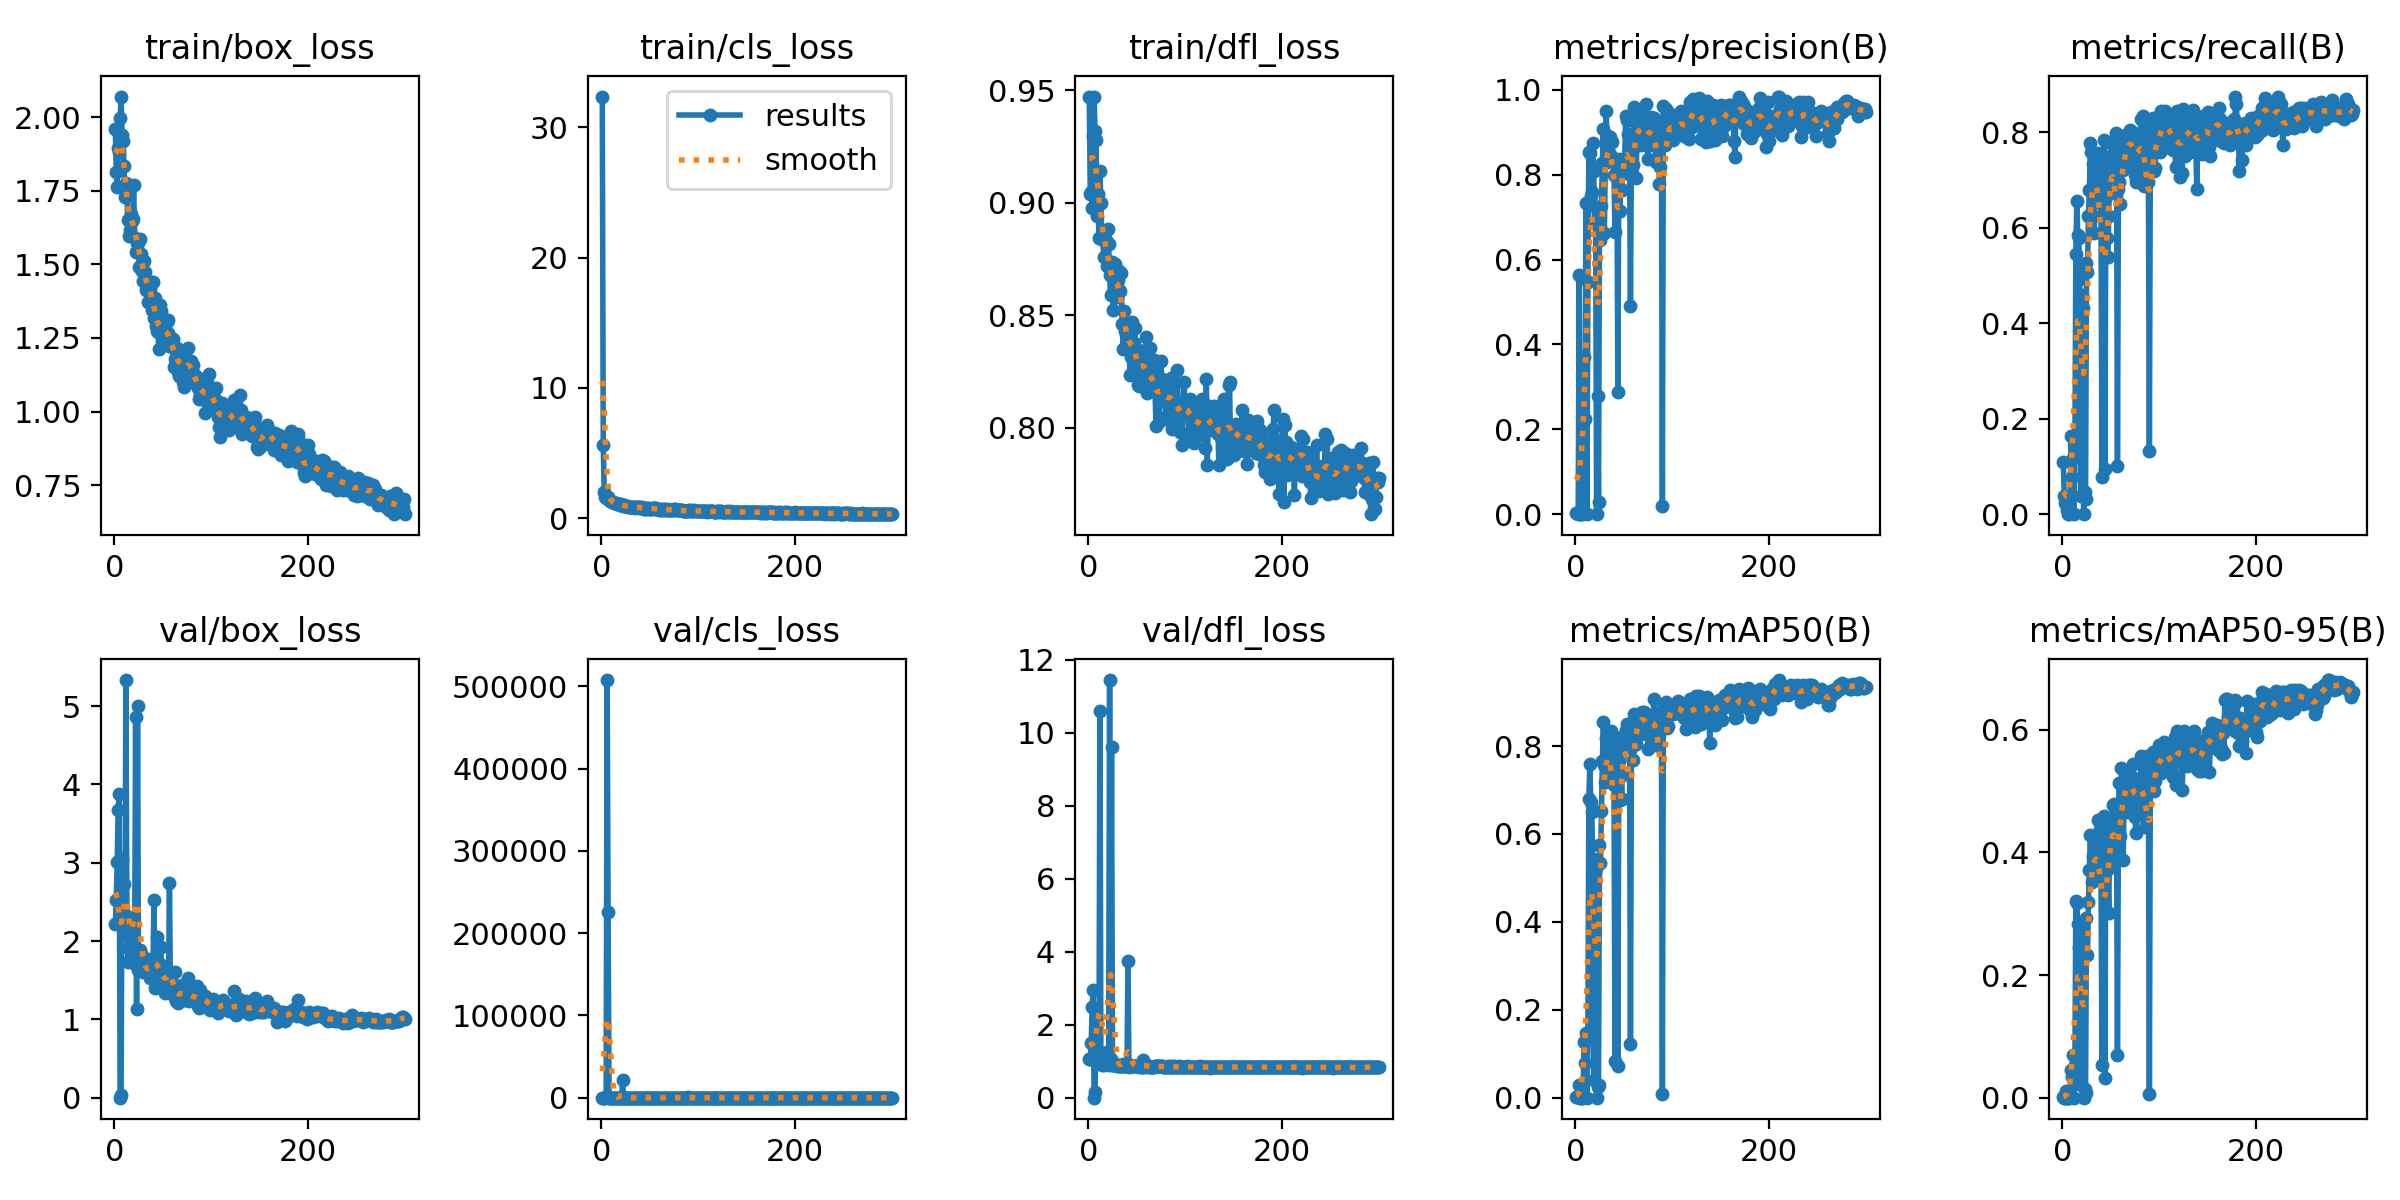

In [11]:
results = Image.open(MODELDIR+'results.png')
display(results)

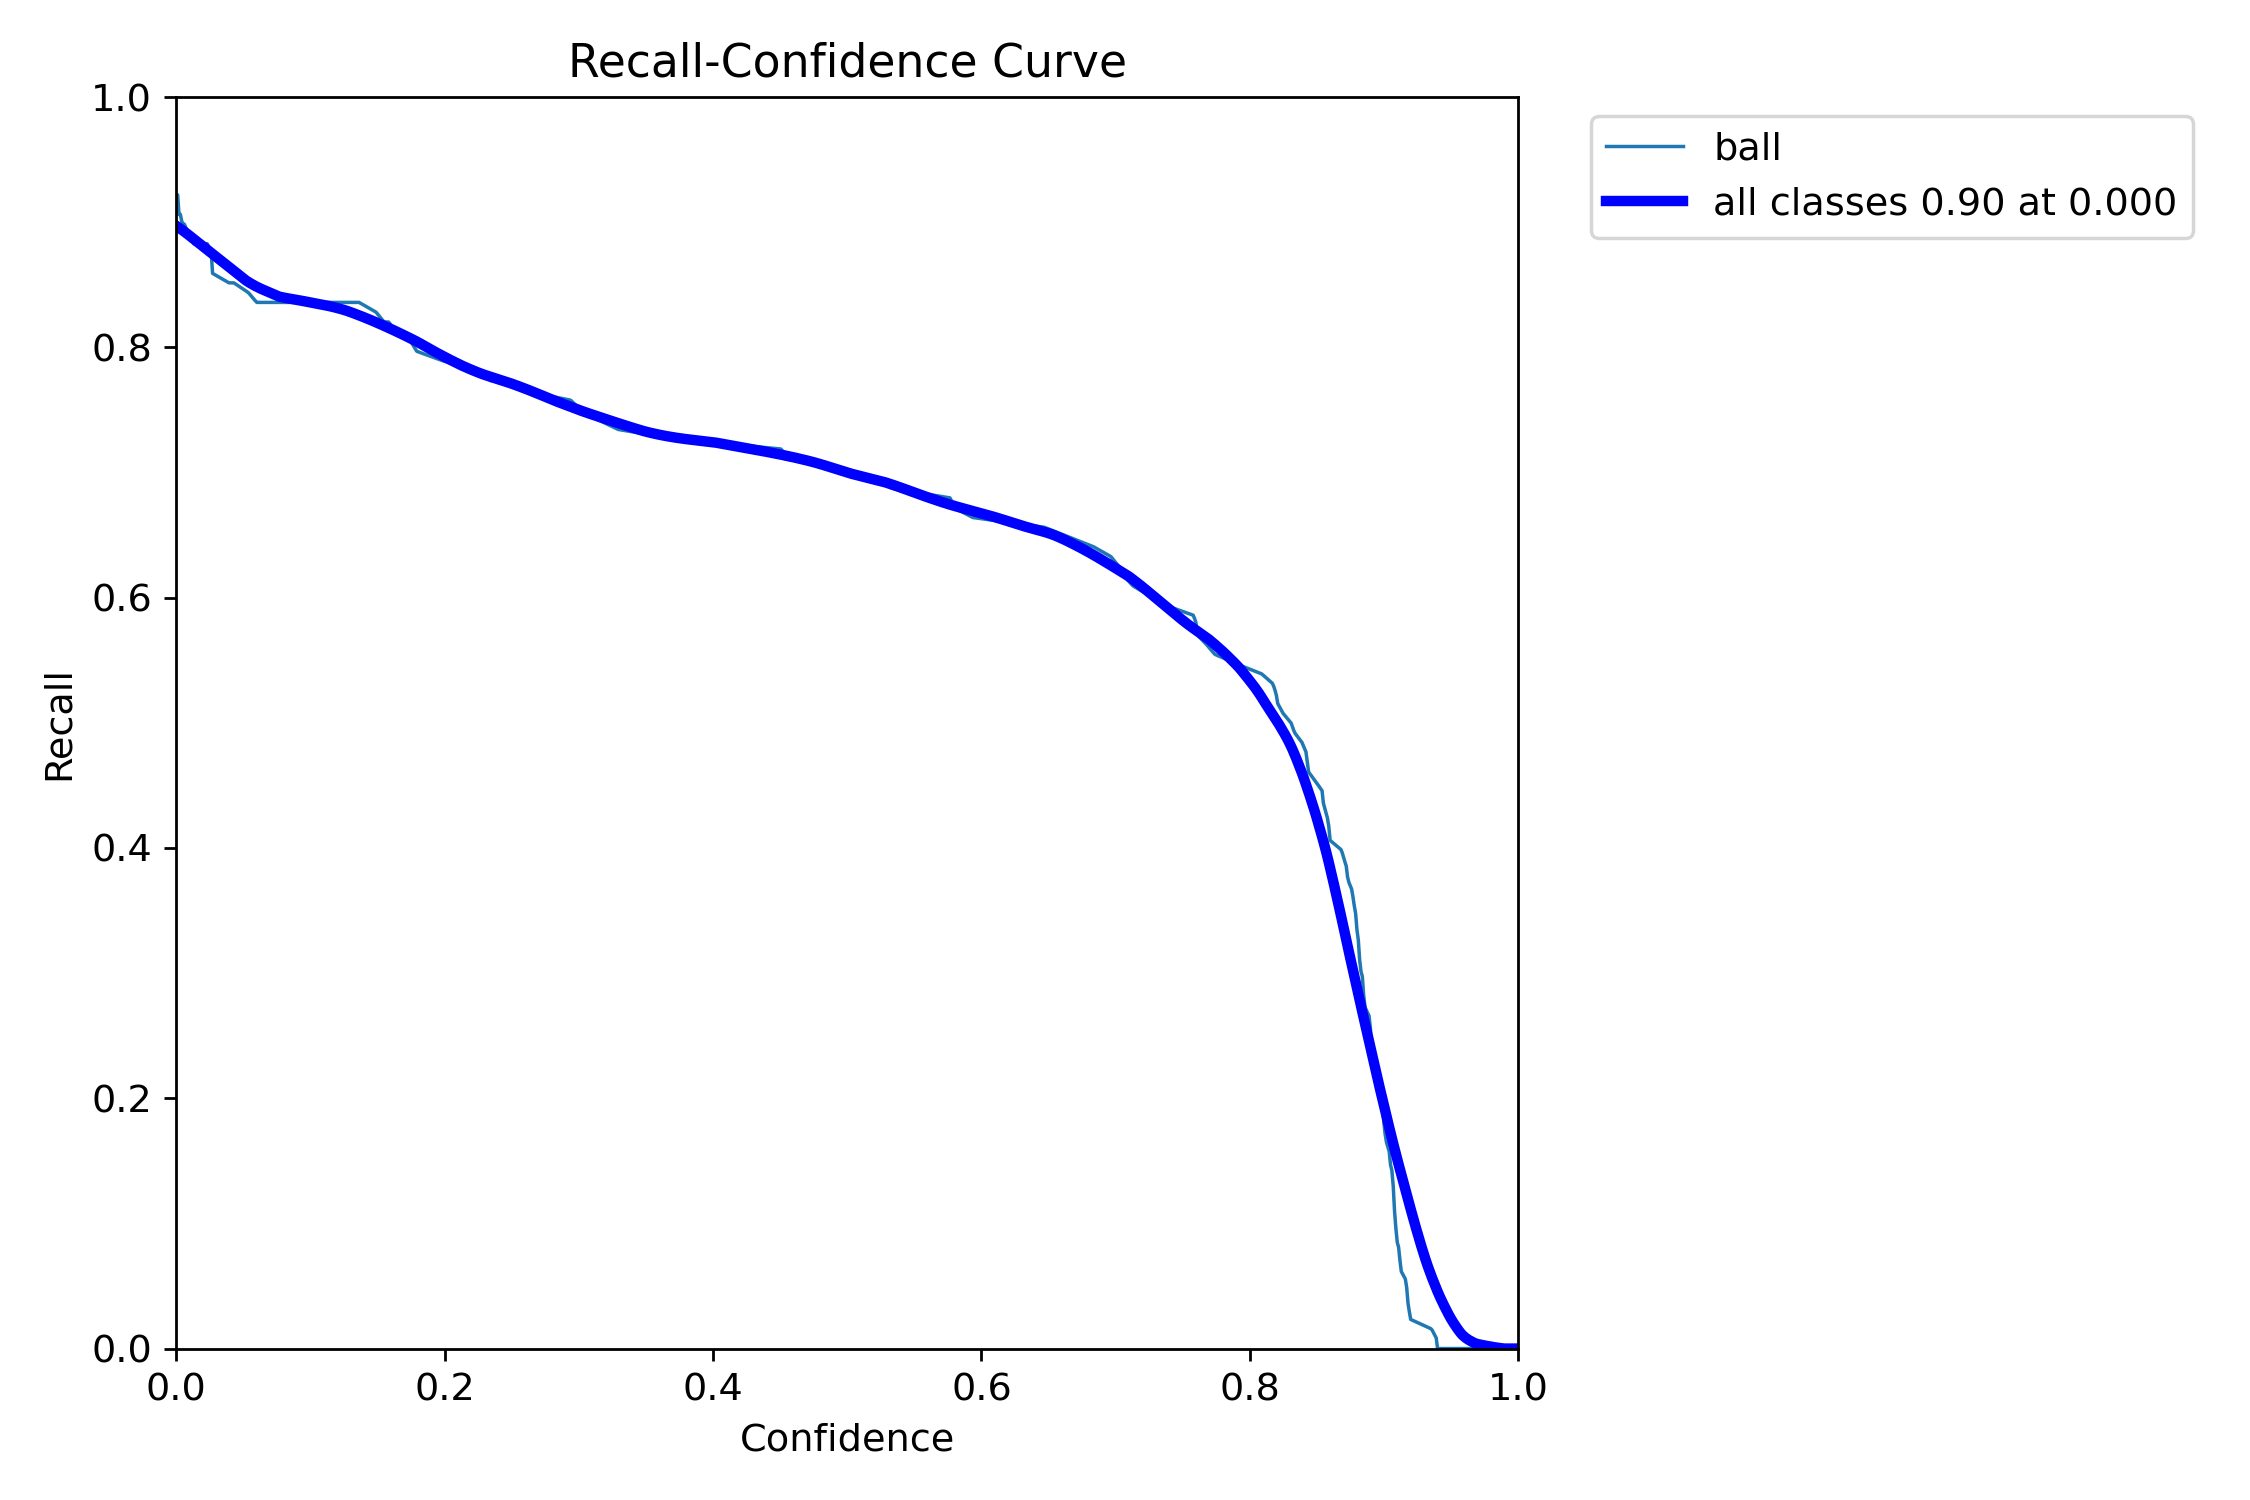

In [12]:
reccurve = Image.open(MODELDIR+'BoxR_curve.png')
display(reccurve)

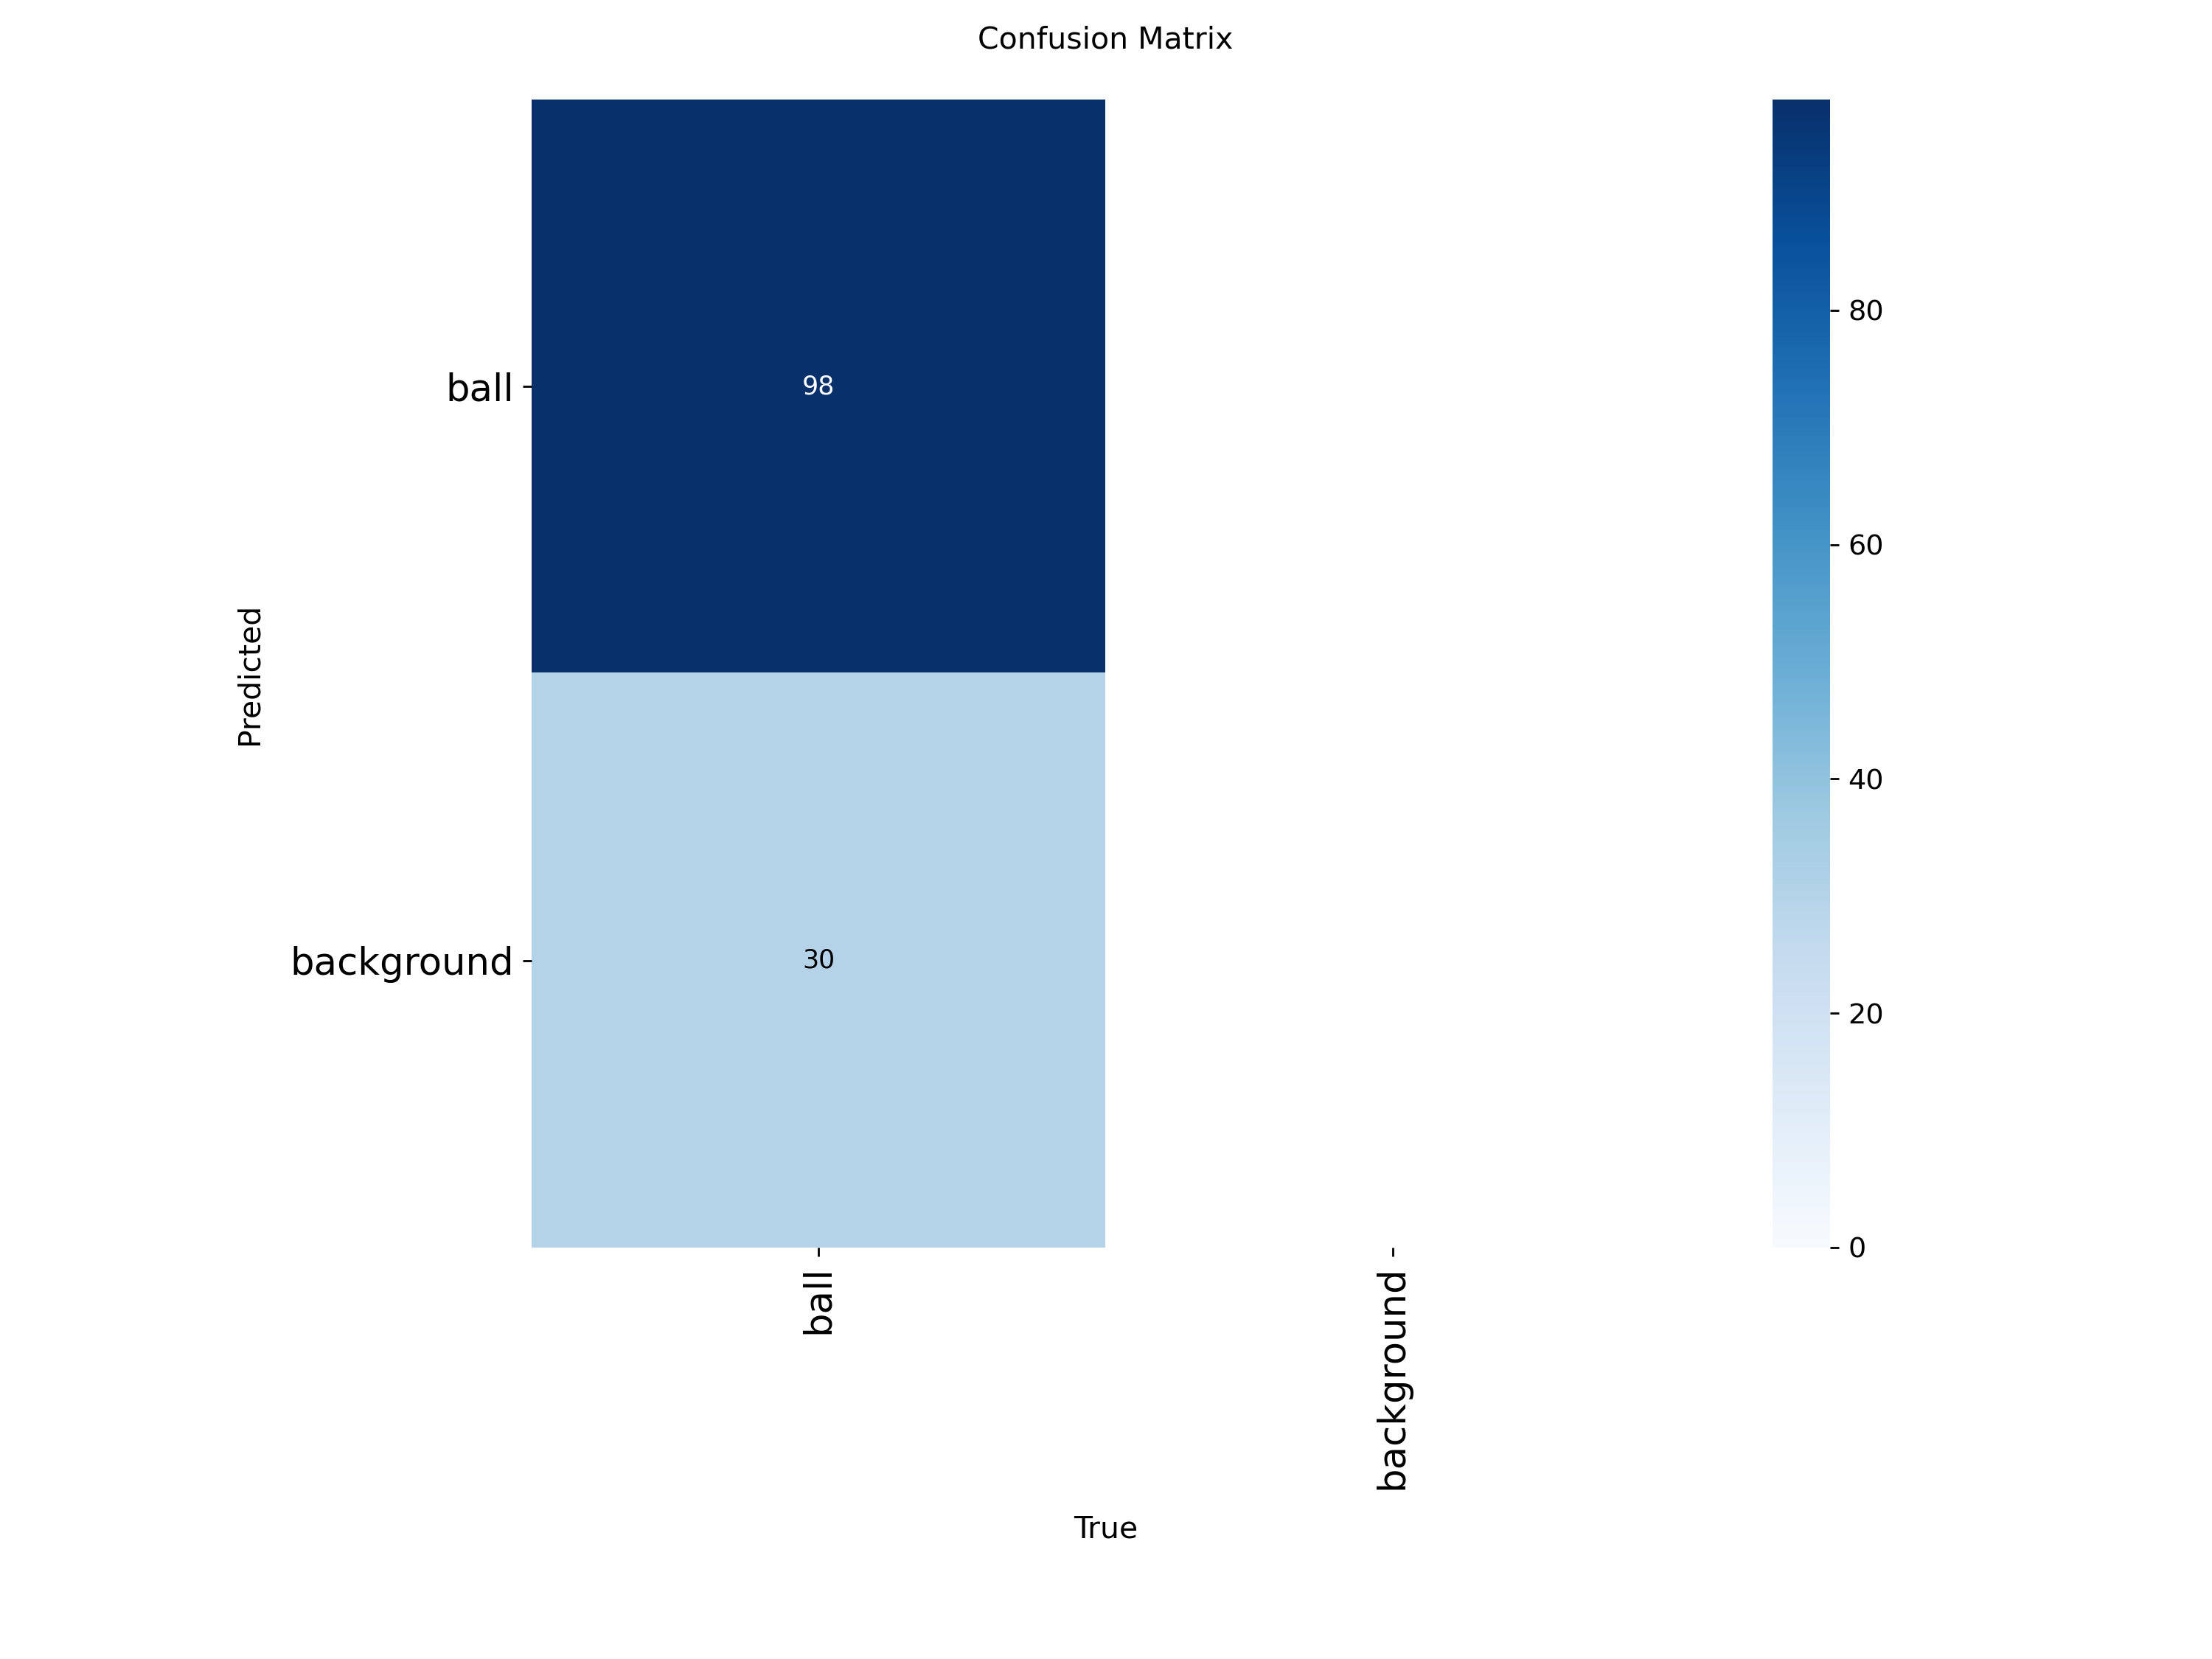

In [13]:
conf = Image.open(MODELDIR+'confusion_matrix.png')
display(conf)